In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [52]:
t1= pd.read_csv('605.1.csv')
t2= pd.read_csv('605.2.csv')
t3= pd.read_csv('605.3.csv')
t4= pd.read_csv('605.4.csv')
t5= pd.read_csv('605.5.csv')
t6= pd.read_csv('605.6.csv')
t7= pd.read_csv('605.7.csv')
t8= pd.read_csv('606.1.csv')
t9= pd.read_csv('606.2.csv')
t10= pd.read_csv('606.3.csv')
t11= pd.read_csv('606.4.csv')
t12= pd.read_csv('606.6.csv')
t13= pd.read_csv('606.7.csv')
t14= pd.read_csv('607.1.csv')
t15= pd.read_csv('607.2.csv')
t16= pd.read_csv('607.3.csv')
t17= pd.read_csv('607.5.csv')
t18= pd.read_csv('607.6.csv')
t19= pd.read_csv('607.7.csv')

In [53]:
combined_df = pd.concat([t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12, t13, t14, t15, t16, t17, t18, t19], ignore_index=True)

In [54]:
X = combined_df.drop(columns=['fid', 'lat', 'long', 'talhao', 'wkt_geom','Altitude1', 'produtivid' ])
y = combined_df['produtivid']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [55]:
kf = KFold(n_splits=4, shuffle=True, random_state=42)

Root Mean Squared Error: 8.483415805079277
 Mean Absolute Error: 6.131745908333449
 R²: 0.8183968852767107


In [76]:
import matplotlib.pyplot as plt
fold_mse = []
fold_mae = []
fold_r2 = []
fold_rmse = []

Fold 1: MSE=75.41184172710803, MAE=6.3067901597950025, R²=0.813359426894797, RMSE=8.68399917820747


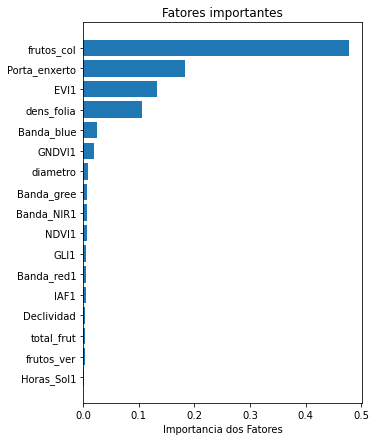

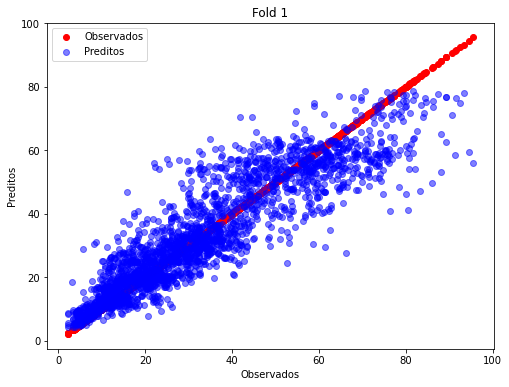

Fold 2: MSE=77.61814155522477, MAE=6.2924761051222005, R²=0.808024347970146, RMSE=8.810115865028381


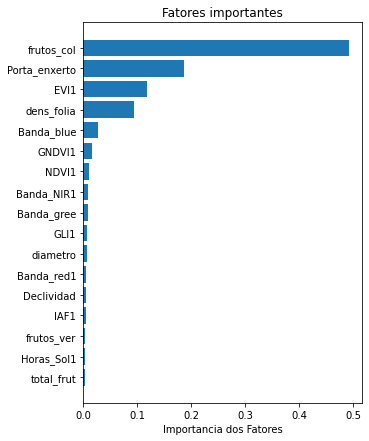

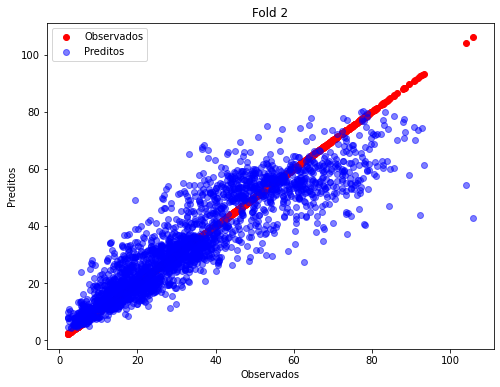

Fold 3: MSE=66.43920505392526, MAE=5.993215526518817, R²=0.823839121558709, RMSE=8.151024785505518


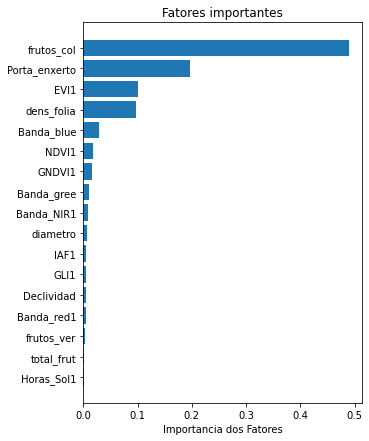

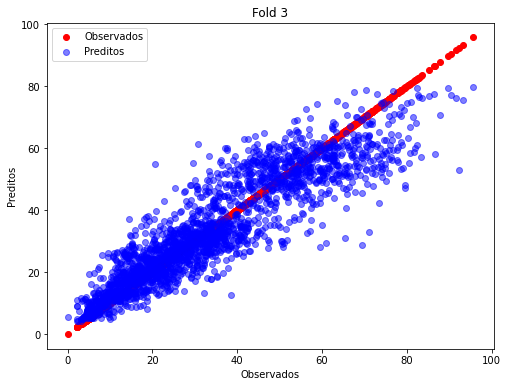

Fold 4: MSE=76.03376821357575, MAE=6.329952771685006, R²=0.8090946563320663, RMSE=8.719734411871485


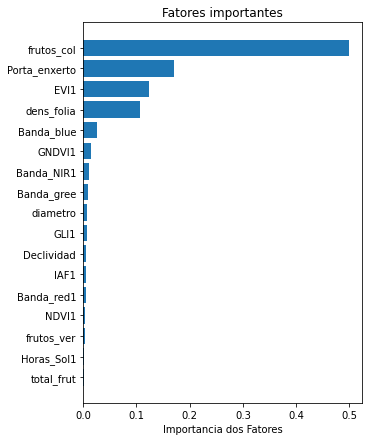

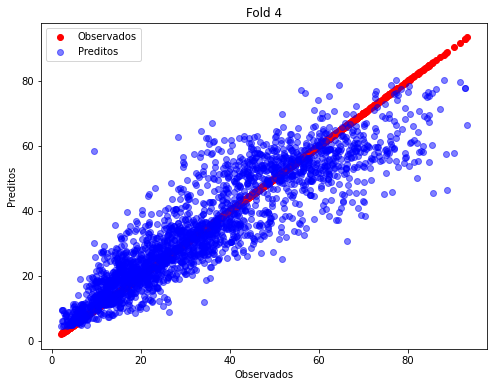

In [86]:
for fold, (train_index, test_index) in enumerate(kf.split(X_scaled)):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf_model = RandomForestRegressor(n_estimators=1000, random_state=42, min_samples_leaf=30, n_jobs=-1)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    fold_mse.append(mse)
    fold_mae.append(mae)
    fold_r2.append(r2)
    fold_rmse.append(rmse)
    print(f"Fold {fold + 1}: MSE={mse}, MAE={mae}, R²={r2}, RMSE={rmse}")
    combined_df.loc[test_index, 'Preditos'] = y_pred
    feat_list = X.columns.values
    feat_imp = rf_model.feature_importances_
    sort_idx = np.argsort(feat_imp)

    plt.figure(figsize=(5,7))
    plt.barh(range(len(sort_idx)),feat_imp[sort_idx], align = 'center')
    plt.yticks(range(len(sort_idx)),feat_list[sort_idx])
    plt.xlabel('Importancia dos Fatores')
    plt.title('Fatores importantes')
    plt.draw()
    plt.show()
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test, color='red', label='Observados', alpha=1.0)  
    plt.scatter(y_test, y_pred, color='blue', label='Preditos', alpha=0.5)  
    plt.title(f"Fold {fold + 1}")
    plt.xlabel("Observados")
    plt.ylabel("Preditos")
    plt.legend()
    plt.show()


In [80]:
avg_mse = sum(fold_mse) / len(fold_mse)
avg_mae = sum(fold_mae) / len(fold_mae)
avg_r2 = sum(fold_r2) / len(fold_r2)
avg_rmse = sum(fold_rmse) / len(fold_rmse)

print("\nMédias em todas as K-folds:")
print(f"MSE: {avg_mse}")
print(f"MAE: {avg_mae}")
print(f"R²: {avg_r2*100}")
print(f"RMSE: {avg_rmse}")


Médias em todas as K-folds:
MSE: 73.87573913745844
MAE: 6.2306086407802574
R²: 81.35793881889296
RMSE: 8.591218560153214


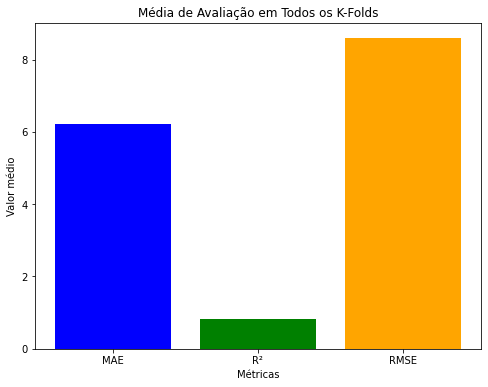

In [83]:
metrics = [ 'MAE', 'R²', 'RMSE']
avg_values = [ avg_mae, avg_r2, avg_rmse]

plt.figure(figsize=(8, 6))
plt.bar(metrics, avg_values, color=['blue', 'green', 'orange'])
plt.title('Média de Avaliação em Todos os K-Folds')
plt.xlabel('Métricas')
plt.ylabel('Valor médio')
plt.show()

In [88]:
combined_df.tail()

,talhao,wkt_geom,fid,lat,long,produtivid,diametro,frutos_col,frutos_ver,total_frut,...,GNDVI1,Horas_Sol1,EVI1,IAF1,GLI1,Declividad,Altitude1,dens_folia,Porta_enxerto,Preditos
9207,607_7,Point (-49.43963285000000241 -22.7861219800000...,9208,-22.786122,-49.439633,22.230446,58.096527,6.600000,17.866667,24.000000,...,0.705,12.5,1.893,-6990342,93.064003,0.000000,551,0.893690,0,18.605386
9208,607_7,Point (-49.4396424099999976 -22.78597959000000...,9209,-22.785980,-49.439642,19.412098,49.418038,8.533333,18.266667,26.066667,...,0.705,12.5,1.893,-6990342,93.064003,0.810231,551,0.894628,0,19.635890
9209,607_7,Point (-49.43964686000000341 -22.7858308200000...,9210,-22.785831,-49.439647,15.978020,61.937876,14.333333,21.866667,36.066667,...,0.684,12.0,1.562,-10500173,38.879002,4.916666,550,0.906220,0,22.922228
9210,607_7,Point (-49.43712585000000104 -22.7884831299999...,9211,-22.788483,-49.437126,19.382692,59.460754,14.533333,22.466667,35.400000,...,0.728,12.5,1.929,-3690419,52.819000,4.355110,556,0.869797,0,20.742724
9211,607_7,Point (-49.43713464999999729 -22.7883373300000...,9212,-22.788337,-49.437135,14.802610,68.539987,18.666667,5.333333,21.266667,...,0.728,12.5,1.929,-3690419,52.819000,4.916666,557,0.871496,0,25.155417
